SpearmanrResult(correlation=0.40028698225994147, pvalue=6.233798041327425e-29)


/data/jinjq/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


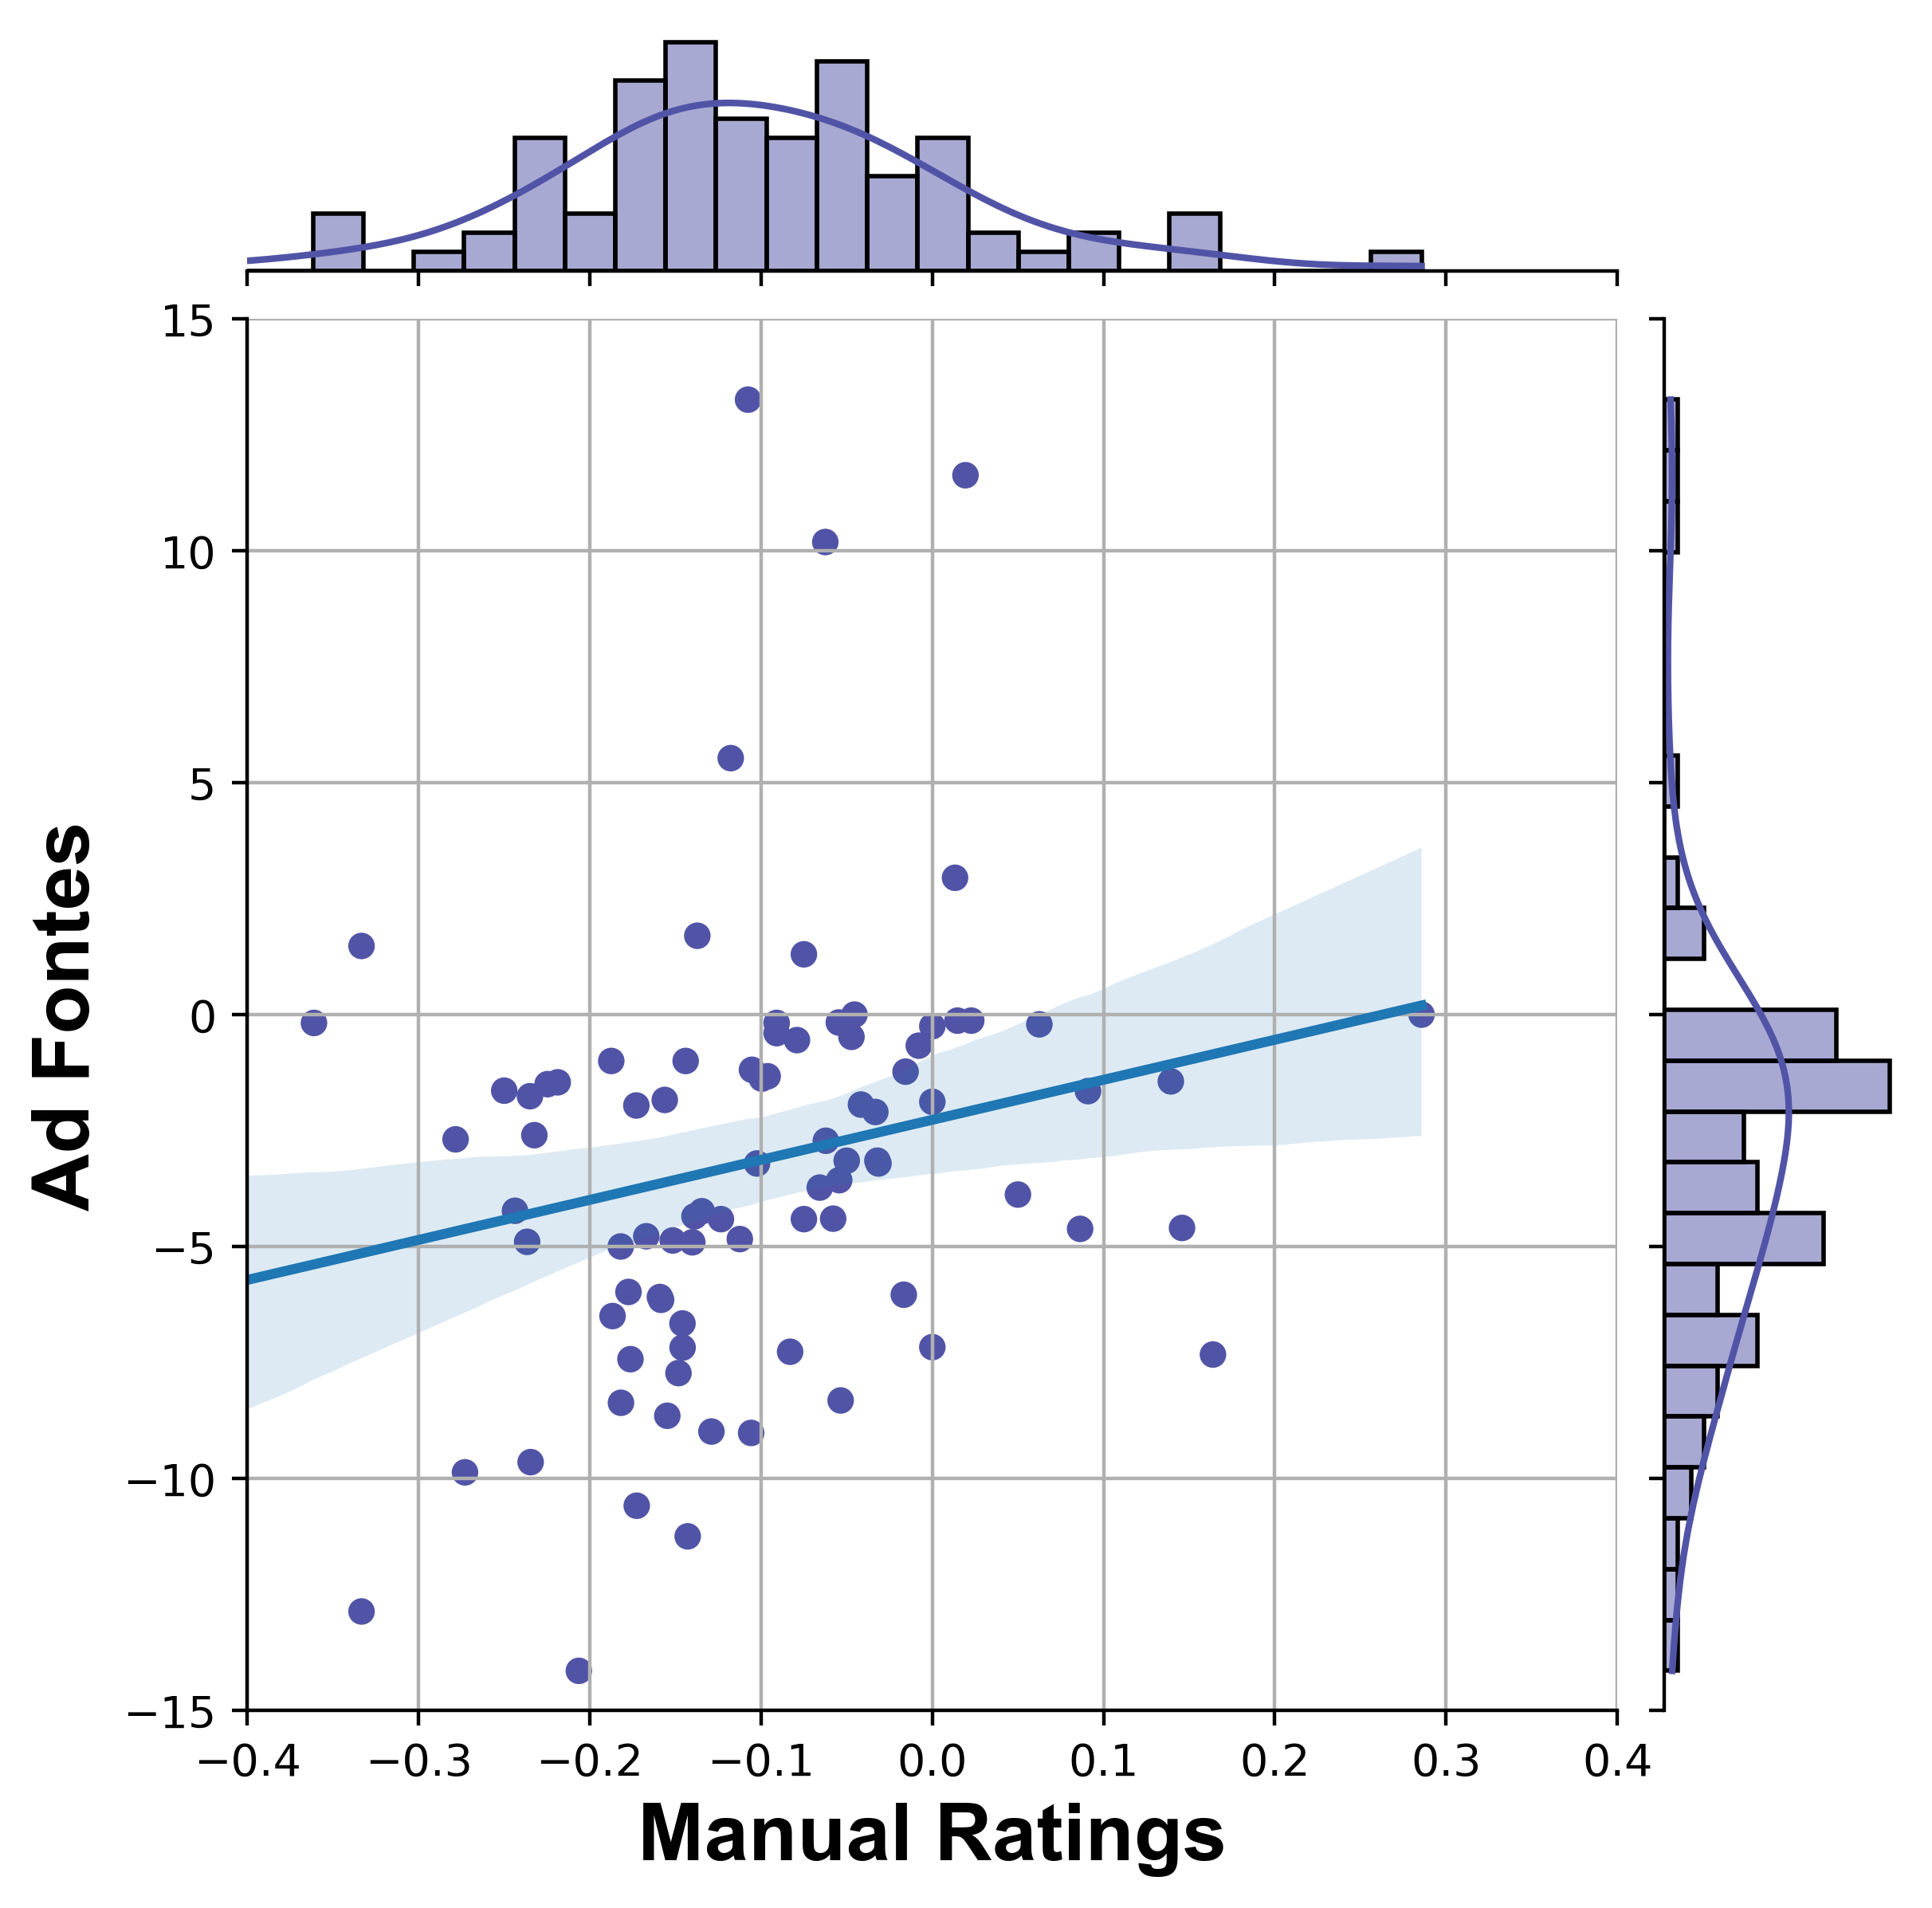

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

source_all = pd.read_csv('../../data/source_all_june.csv').set_index('i')
manual = source_all[['source','manual']]
manual = manual[manual['manual']<66]
manual.reset_index(inplace=True)
manual = manual.groupby(by=['source'])['manual'].mean().reset_index()
manual.set_index(['source'],inplace=True)

source_all = source_all[source_all['poli2']<66]
source_all = source_all[source_all['manual']<66]
source_all.reset_index(inplace=True)
source_all = source_all.rename(columns={'poli2':'Ad Fontes', 'manual':'Manual Ratings'})
for idx in range(len(source_all)):
    source_all.iloc[idx,-1] = manual.loc[source_all.iloc[idx,2],'manual']
print(stats.spearmanr(source_all['Manual Ratings'].values,source_all['Ad Fontes'].values))

grouped_data = source_all.groupby(['Manual Ratings', 'Ad Fontes']).size().reset_index(name='counts')

g = sns.jointplot(data=grouped_data, x="Manual Ratings", y="Ad Fontes", kind="reg", dropna=False, marginal_kws=dict(bins=25, rug=True, color='#5154A6'))
g.fig.set_dpi(400)
g.fig.set_figsize=(3,3)

g.ax_joint.cla()

sns.scatterplot(data=grouped_data, x="Manual Ratings", y="Ad Fontes", edgecolor="none", legend=False, ax=g.ax_joint, color='#5154A6')

sns.regplot(data=grouped_data, x="Manual Ratings", y="Ad Fontes", scatter=False, ax=g.ax_joint)

g.ax_joint.grid(True)
g.ax_joint.set_xlim([-0.4,0.4])
g.ax_joint.set_ylim([-15,15])

# Set axis labels bold
g.ax_joint.set_xlabel("Manual Ratings", fontproperties='Arial', fontweight='bold', size=18)
g.ax_joint.set_ylabel("Ad Fontes", fontproperties='Arial', fontweight='bold', size=18)
plt.savefig('./figures/manual_adfontes_S2A.pdf', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()

SpearmanrResult(correlation=0.3597230769420109, pvalue=2.0492158788400103e-22)


/data/jinjq/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


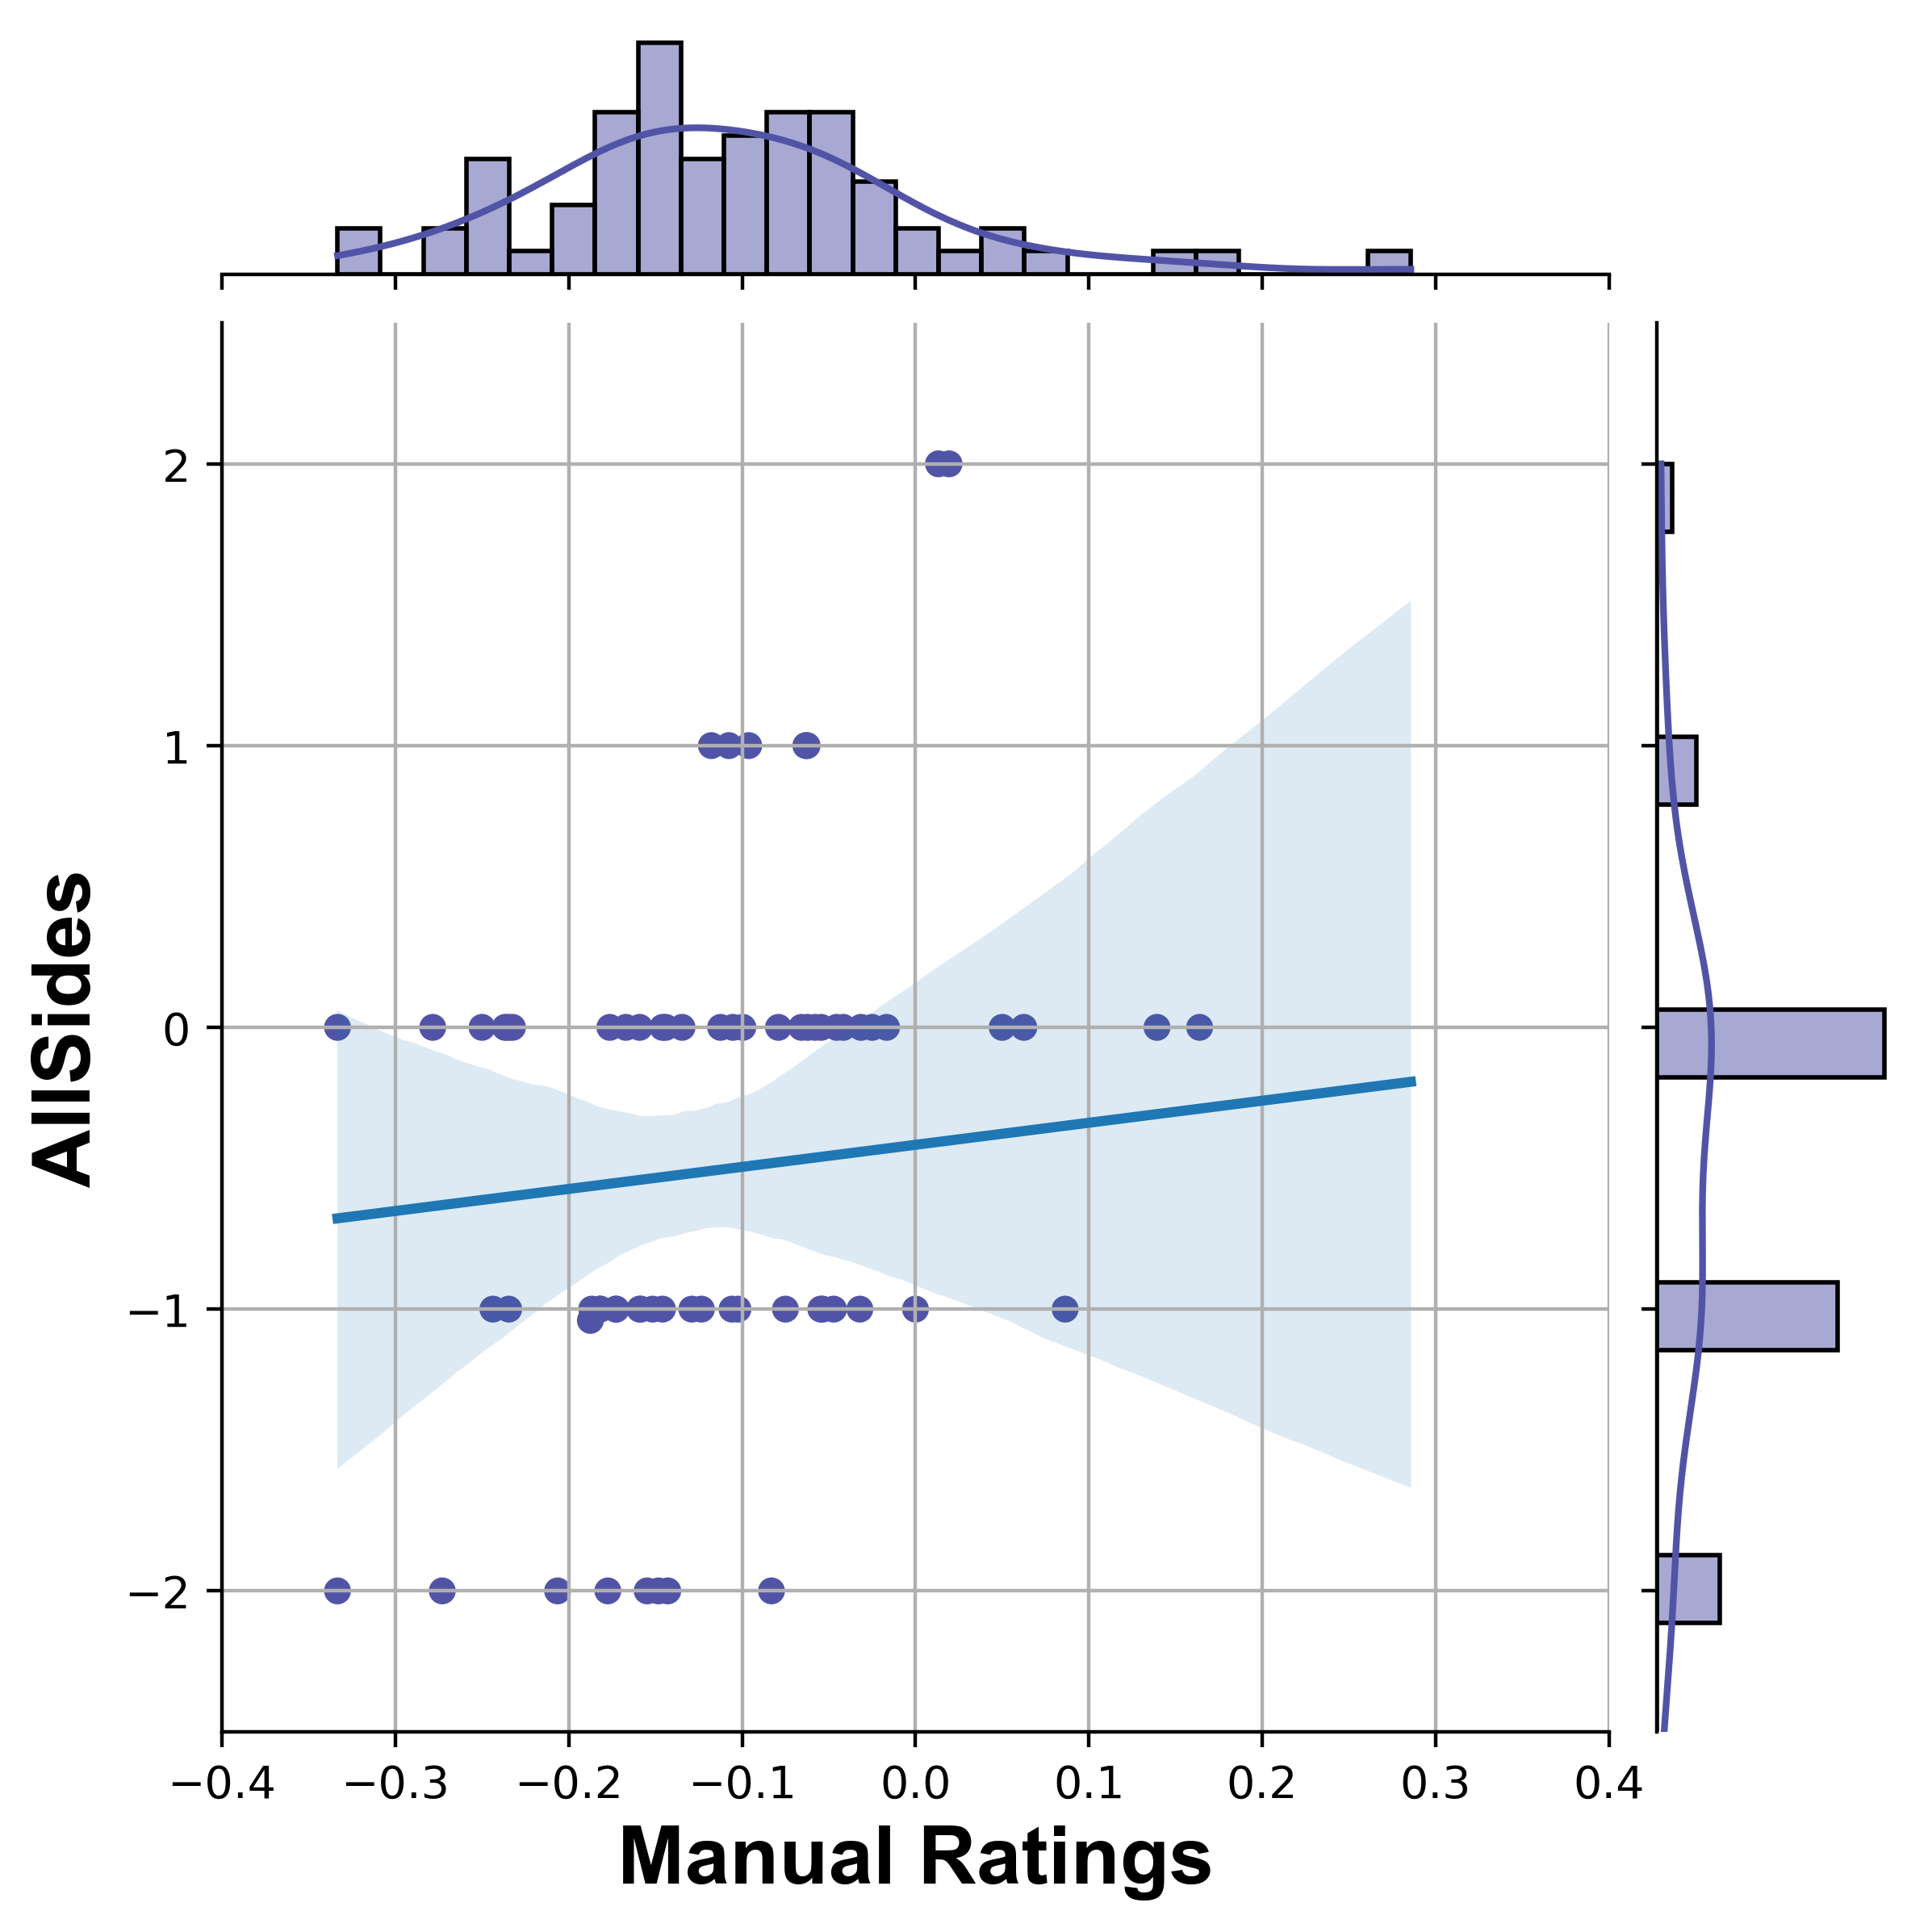

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

source_all = pd.read_csv('../../data/source_all_june.csv').set_index('i')
manual = source_all[['source','manual']]
manual = manual[manual['manual']<66]
manual.reset_index(inplace=True)
manual = manual.groupby(by=['source'])['manual'].mean().reset_index()
manual.set_index(['source'],inplace=True)

source_all = source_all[source_all['poli5']<66]
source_all = source_all[source_all['manual']<66]
source_all.reset_index(inplace=True)
source_all = source_all.rename(columns={'poli5':'AllSides', 'manual':'Manual Ratings'})
for idx in range(len(source_all)):
    source_all.iloc[idx,-1] = manual.loc[source_all.iloc[idx,2],'manual']
print(stats.spearmanr(source_all['Manual Ratings'].values,source_all['AllSides'].values))

grouped_data = source_all.groupby(['Manual Ratings', 'AllSides']).size().reset_index(name='counts')

g = sns.jointplot(data=grouped_data, x="Manual Ratings", y="AllSides", kind="reg", dropna=False, marginal_kws=dict(bins=25, rug=True, color='#5154A6'))
g.fig.set_dpi(400)
g.fig.set_figsize=(3,3)

g.ax_joint.cla()

sns.scatterplot(data=grouped_data, x="Manual Ratings", y="AllSides", edgecolor="none", legend=False, ax=g.ax_joint, color='#5154A6')

sns.regplot(data=grouped_data, x="Manual Ratings", y="AllSides", scatter=False, ax=g.ax_joint)

g.ax_joint.grid(True)
g.ax_joint.set_xlim([-0.4,0.4])
g.ax_joint.set_ylim([-2.5,2.5])

# Set axis labels bold
g.ax_joint.set_xlabel("Manual Ratings", fontproperties='Arial', fontweight='bold', size=18)
g.ax_joint.set_ylabel("AllSides", fontproperties='Arial', fontweight='bold', size=18)
plt.savefig('./figures/manual_allsides_S2B.pdf', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()